# 6. Read CSV Data from S3 Folder into Pandas DataFrame

Lastly, I will read the `datatoken.csv` data from my `big-data-google-bucket` S3 folder into a pandas DataFrame using S3 path and pd.read_csv. Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

In [2]:
# need boto3 to interact with s3
import boto3

In [3]:
# the .client() object in boto3 is what we use to access and use our s3 buckets
s3 = boto3.client('s3')

To view the S3 buckets in my account, I will use the `.list_buckets()` method.

In [4]:
# view buckets
bucket_list = s3.list_buckets()
bucket_list

{'ResponseMetadata': {'RequestId': 'E229B9C4704CB954',
  'HostId': 'NVWW7iqbv9jDe8Z1S+1djt1AT8joIX7T+KJDEIV8GFrD1H0P8f6Gs+J2nW9JTmZvhH6/d3USkcc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'NVWW7iqbv9jDe8Z1S+1djt1AT8joIX7T+KJDEIV8GFrD1H0P8f6Gs+J2nW9JTmZvhH6/d3USkcc=',
   'x-amz-request-id': 'E229B9C4704CB954',
   'date': 'Mon, 07 Dec 2020 04:33:52 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'aws-emr-resources-564399015445-ca-central-1',
   'CreationDate': datetime.datetime(2020, 12, 1, 15, 35, 35, tzinfo=tzutc())},
  {'Name': 'aws-logs-564399015445-ca-central-1',
   'CreationDate': datetime.datetime(2020, 11, 27, 18, 19, 20, tzinfo=tzutc())},
  {'Name': 'big-data-google-bucket',
   'CreationDate': datetime.datetime(2020, 12, 7, 2, 57, 38, tzinfo=tzutc())}],
 'Owner': {'ID': 'beac8589107b6d2b1800dd9f5a87fee57867cecaf3d1489fbc4cac8e8fb8e1f5'}}

Although this may look confusing as its shown in the form of a dictionary, we can see that the `big-data-google-bucket` is shown within the bucket list.

To look into that specific bucket now, we must do the following:

In [6]:
# list files inside a specified bucket
bucket_files = s3.list_objects_v2(Bucket='big-data-google-bucket')
bucket_files

{'ResponseMetadata': {'RequestId': '7C236CBB5BB952DF',
  'HostId': '+b8pT6g97TCg9tqsxiAYYkdAZN35+PlEVq801ysOqCT1VCr99hIhZMYEJ7ZmpIju0Eq5ojpPSHY=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '+b8pT6g97TCg9tqsxiAYYkdAZN35+PlEVq801ysOqCT1VCr99hIhZMYEJ7ZmpIju0Eq5ojpPSHY=',
   'x-amz-request-id': '7C236CBB5BB952DF',
   'date': 'Mon, 07 Dec 2020 04:36:23 GMT',
   'x-amz-bucket-region': 'ca-central-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Contents': [{'Key': 'datatoken.csv',
   'LastModified': datetime.datetime(2020, 12, 7, 4, 17, 15, tzinfo=tzutc()),
   'ETag': '"db5c4349824c7fe5685fb904d2e52044"',
   'Size': 7305,
   'StorageClass': 'STANDARD'}],
 'Name': 'big-data-google-bucket',
 'Prefix': '',
 'MaxKeys': 1000,
 'EncodingType': 'url',
 'KeyCount': 1}

Now in order to download the `datatoken.csv` file from my big-data-google-bucket, I will use the `.download_file()` method on my S3 client object.

In [8]:
# 3 arguments: bucket name, file name, destination file path on your local machine
s3.download_file(Bucket = 'big-data-google-bucket', Key = 'datatoken.csv', Filename = 'datatoken.csv')

Lastly, I can read the `datatoken.csv` data from the S3 folder into a pandas DataFrame using `pd.read_csv`

In [12]:
# need pandas
import pandas as pd

# verify that the download to our local machines has worked successfully
datatoken_df = pd.read_csv('datatoken.csv', index_col=0)
datatoken_df

,year,frequency,pages,books
token,,,,
data,1584,16,14,1
data,1614,3,2,1
data,1627,1,1,1
data,1631,22,18,1
data,1637,1,1,1
...,...,...,...,...
data,2004,201841,93539,3483
data,2005,197467,88901,3392
data,2006,203669,92960,3449


Now that we have our data we can use it to plot the number of occurrences of the token (the frequency column) of data over the years.

In [14]:
import matplotlib as plt
import matplotlib.pyplot as plt

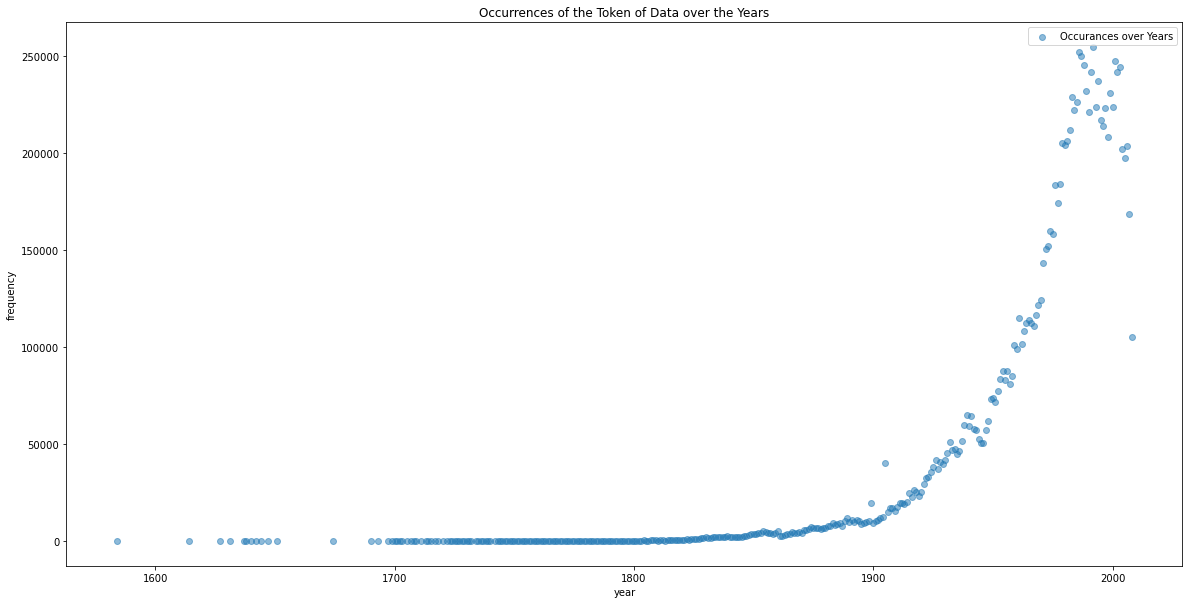

In [17]:
# Plotting the number of occurrences of the token (the frequency column) of data over the years

# Configuring the figure/chart size.
plt.figure(figsize=(20, 10))

# Plotting the data
plt.scatter(datatoken_df['year'], datatoken_df['frequency'], alpha=0.5, label = 'Occurances over Years')
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Occurrences of the Token of Data over the Years')
plt.legend(loc='best')

plt.show()